# Hands-on-data #2

The goal of this assignment is for you to practice simple visualizations applied to educational data. You can create those visualizations with Excel or any other software of your choice.

When submitting the assignment, submit a text document that includes your visualizations as well as explanations for your answers.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import ho2


## Question 1 (1.5 point)

Draw scatterplots and heatmap for the datasets named [Assignment-2-Scatterplot1.csv](./data/Assignment-2-Scatterplot-1.csv) and [Assignment-2-Scatterplot-2.csv](./data/Assignment-2-Scatterplot-2.csv). In both cases, give a quick description of the distribution of the data points and explain which visualization (scatterplot or heat map) is most appropriate.

In [2]:
scatter1 = pd.read_csv('./data/Assignment-2-Scatterplot-1.csv')
scatter2 = pd.read_csv('./data/Assignment-2-Scatterplot-2.csv')

(None, None)

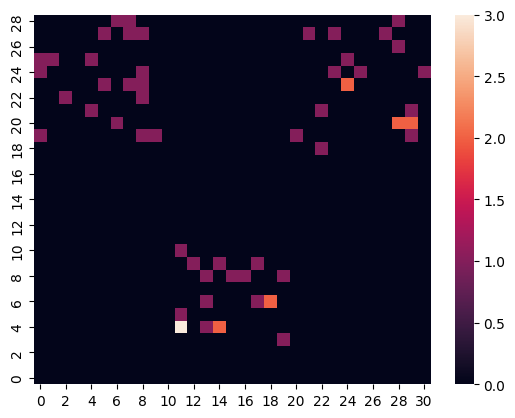

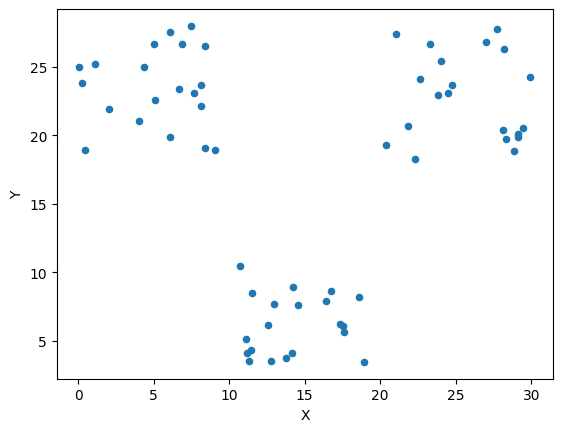

In [3]:
ho2.plot_heatmap(scatter1), ho2.plot_scatter(scatter1)

For `scatterplot-1`, we can see that points are clustered in 3 regions.
There isn't a lot of overlap for each data point, so a scatterplot is appropriate

(None, None)

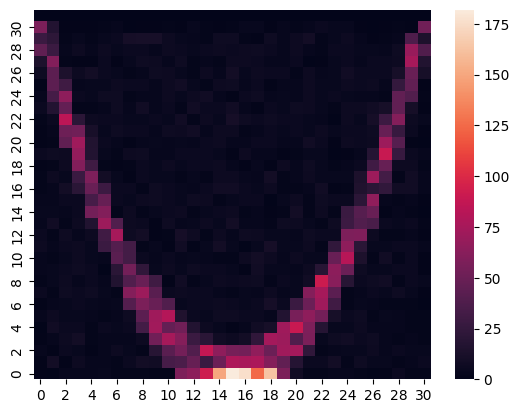

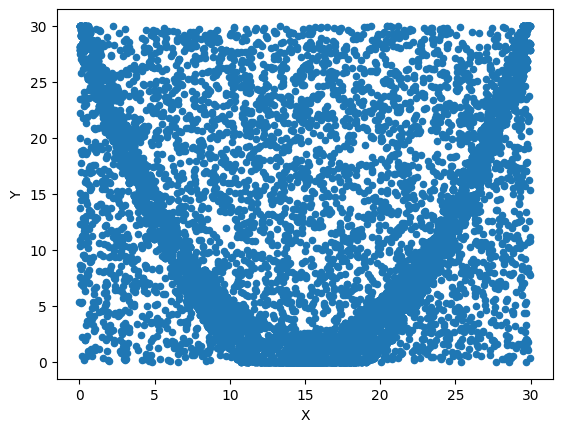

In [4]:
ho2.plot_heatmap(scatter2), ho2.plot_scatter(scatter2)

For `scatterplot-2`, many of the datapoints overlap.
The heatmap is the more appropriate visualization method, as in it we can better observe that the points are concentrated around the contour of a parabola.

## Question 2 (1.5 point)

Using the dataset named [ASSISTments-sample.csv](./data/ASSISTments-sample.csv), draw the learning curves for the skills named “Box and Whisker” and “Inverse Relation”. Provide a short description/analysis of each curve.

Granularity by minute

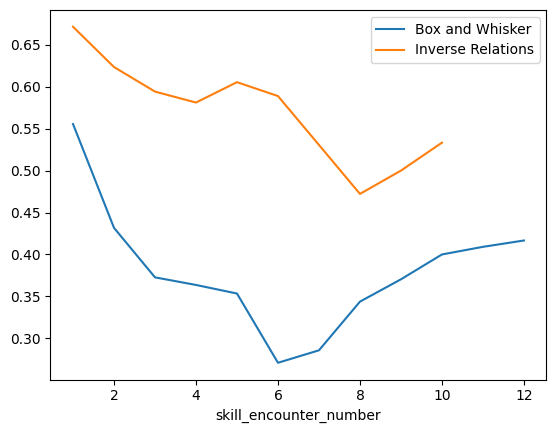

In [215]:
assistment = pd.read_csv('./data/ASSISTments-sample.csv')\
        .drop(columns=['problem_id', 'assignment_id', 'assistment_id', 'end_time', 'problem_type', 'hint_count', 'original'])\

def learning_curve_for(original_df: pd.DataFrame, skill: str):
        df = original_df[original_df['skill'] == skill]
        df = df\
                .sort_values(['user_id', 'start_time'])\
                .reset_index()
        df['skill_encounter_number'] = df.groupby('user_id').cumcount() + 1
        df['correct'] = df.groupby('user_id')['correct'].cumsum() / df['skill_encounter_number']
        df['error'] = 1 - df['correct']

        ax = df.groupby('skill_encounter_number')['error'].mean().plot(label=skill)
        ax.legend()

learning_curve_for(assistment, 'Box and Whisker')
learning_curve_for(assistment, 'Inverse Relations')

skill  problem_id  user_id  assignment_id  \
51          Box and Whisker       28915    52458         175269   
232              Congruence       33746    52483         175290   
308         Box and Whisker       51424    52489         218156   
319         Box and Whisker       36843    52491         175321   
352         Box and Whisker       51480    52493         218156   
...                     ...         ...      ...            ...   
3043      Inverse Relations        8718    73543         175992   
3045      Inverse Relations        4535    73589         176431   
3082             Congruence        1263    73963         176974   
3099             Congruence       40345    74384         206843   
3137  Area Irregular Figure       77440    74673         232370   

      assistment_id start_time end_time problem_type  original  correct  \
51            24733    32:37.7  32:37.0    fill_in_1         1        1   
232           26292    58:41.8  00:03.0     choose_1         1        0   
308           33139    44:39.0  44:38.6      algebra         1        1   
319           27833    59:17.0  00:32.8      algebra         1        0   
352           33195    59:41.4  02:03.8      algebra         1        0   
...             ...        ...      ...          ...       ...      ...   
3043           8718    29:33.2  29:13.6     choose_1         1        0   
3045           4535    53:18.8  31:11.5     choose_1         1        1   
3082           1263    46:25.3  24:45.6      algebra         1        0   
3099          28851    56:30.0  00:31.7      algebra         1        1   
3137          43124    25:04.7  09:25.3      algebra         1        0   

      hint_count time  
51             0   32  
232            0   58  
308            0   44  
319            0   59  
352            0   59  
...          ...  ...  
3043           0   29  
3045           0   53  
3082           0   46  
3099           0   56  
3137           0   25  

[116 rows x 12 columns]

We assume that the assignments follow each other chronologically (e.g. assignment 2 comes after assignment 1).

In [ ]:
skill='Inverse Relations'
k=assistment.loc[assistment['skill'] == skill]
len(k['assignment_id'].unique())

41

## Question 3 (2 point)

Create a visualization using either the [ASSISTments](./data/ASSISTments-sample.csv) (this can include the features created during Weeks 2-3) or the [Cognitive Tutor](./data/CognitiveTutorAlgebra-gaming-clips.csv) (this can include the features created in Assignment 1) datasets. You are not limited to visualization types seen in class. Feel free to use other types of visualization (for example histograms or pie charts). Explain the goal behind the visualization (what information are you trying to convey) as well as a quick analysis of the result of applying this visualization to the dataset.

### Percent Incorrect for a Given Student

The function `plot_percent_incorrect` plots the percent of actions that resulted in either a `WRONG` or a `BUG` assessment for a given student.

As an example, any time student `z9svx3mA4s` tried to use the `squareroot` action, it resulted in an incorrect assessment.

A teacher could use this plot to see where their students are making the most mistakes. For student `z9svx3mA4s`, it could be that they need a refresher on squareroots.

In [80]:
cog_data = pd.read_csv('./data/CognitiveTutorAlgebra-gaming-clips.csv')

In [111]:
def plot_percent_incorrect(df: pd.DataFrame, student: str):
        def map_assessment(val: str):
                return lambda x: 1 if x==val else 0
        df['Correct'] = df['assessment'].apply(map_assessment('RIGHT'))
        df['Incorrect'] = df['assessment'].apply(lambda x: 1 if x=='WRONG' or x=='BUG' else 0)
        df = df[df['assessment'] != 'HELP']
        k=df.groupby(['student','action']).mean(numeric_only=True).reset_index()
        k[k['student']==student]\
                .sort_values('Correct')\
                .set_index('action')['Incorrect']\
                .plot.bar(title=f'Student {student} Percent Incorrect', ylabel='Percent Inorrect',ylim=(0,1))
        return k

student      action         Row ID       time    Gaming clip  \
0    AQfVkV1aEx       BLANK  197555.995407  18.476815  196508.756563   
1    AQfVkV1aEx         add  197507.451613  31.354839  196149.000000   
2    AQfVkV1aEx      aproot  197896.500000  36.500000            NaN   
3    AQfVkV1aEx         clt  198072.714286  29.071429            NaN   
4    AQfVkV1aEx  distribute  198707.428571  15.660714            NaN   
..          ...         ...            ...        ...            ...   
867  z9svx3mA4s        simp  282338.250000  16.875000            NaN   
868  z9svx3mA4s       split  281807.181818   9.000000            NaN   
869  z9svx3mA4s  squareroot  280489.000000   3.000000            NaN   
870  z9svx3mA4s    subtract  278728.905000   9.305000  278126.375000   
871  z9svx3mA4s      typein  278392.302632   6.718045  275737.000000   

      Correct  Incorrect  
0    0.621610   0.378390  
1    0.774194   0.225806  
2    0.333333   0.666667  
3    0.285714   0.714286  
4    0.892857   0.107143  
..        ...        ...  
867  0.875000   0.125000  
868  0.363636   0.636364  
869  0.000000   1.000000  
870  0.905000   0.095000  
871  0.906015   0.093985  

[872 rows x 7 columns]

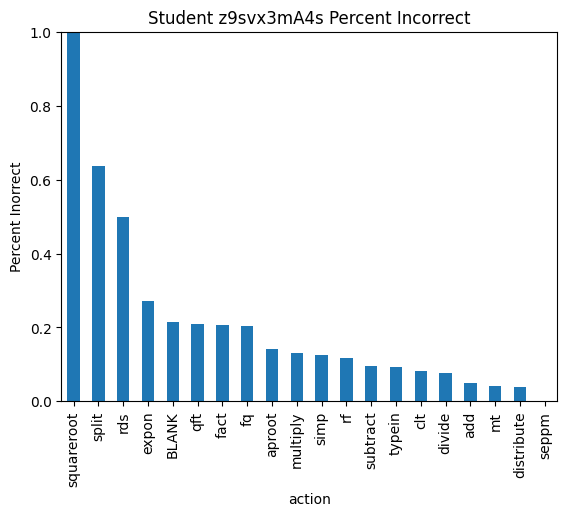

In [112]:
plot_percent_incorrect(cog_data, 'z9svx3mA4s')